In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Especificar la ruta del archivo CSV
ruta_archivo = 'sueldos_ciudad_buenos_aires.csv'
# Cargar el archivo CSV en un DataFrame
df_datos = pd.read_csv(ruta_archivo)

In [4]:
df_datos['FECHA'] = pd.to_datetime(df_datos['FECHA'])

In [8]:
df_datos.info(

)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3477 entries, 0 to 3476
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   FECHA            3477 non-null   datetime64[ns]
 1   NOMBRE           3477 non-null   object        
 2   PUESTO           3477 non-null   object        
 3   dolarAsignacion  3477 non-null   float64       
 4   dolarBruto       3477 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 135.9+ KB


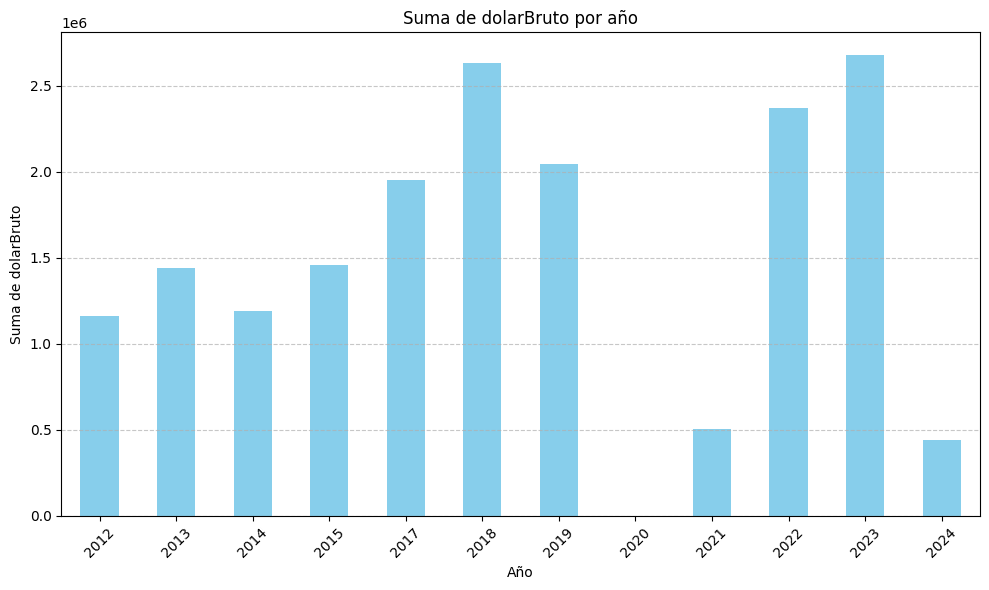

In [10]:

# Agrupar los datos por año y calcular la suma de 'dolarBruto' para cada año
suma_dolar_bruto_por_año = df_datos.groupby(df_datos['FECHA'].dt.year)['dolarBruto'].sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
suma_dolar_bruto_por_año.plot(kind='bar', color='skyblue')
plt.title('Suma de dolarBruto por año')
plt.xlabel('Año')
plt.ylabel('Suma de dolarBruto')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor visualización
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Añadir rejilla horizontal
plt.tight_layout()
plt.show()

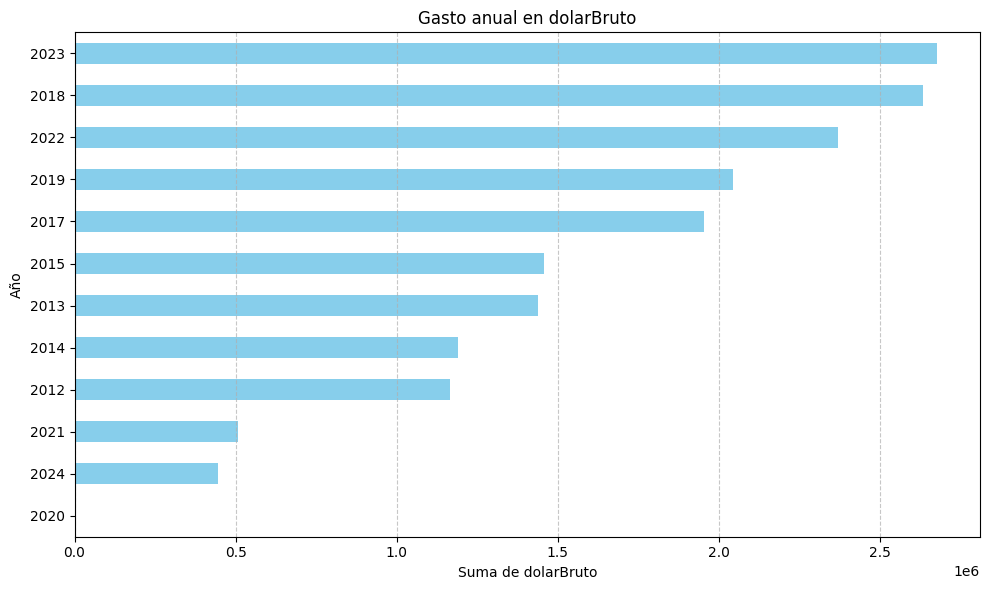

In [12]:
# Agrupar los datos por año y calcular la suma de 'dolarBruto' para cada año
suma_dolar_bruto_por_año = df_datos.groupby(df_datos['FECHA'].dt.year)['dolarBruto'].sum()

# Ordenar los años de mayor a menor suma y luego invertir el orden
suma_dolar_bruto_por_año = suma_dolar_bruto_por_año.sort_values(ascending=False)[::-1]

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
suma_dolar_bruto_por_año.plot(kind='barh', color='skyblue')
plt.title('Gasto anual en dolarBruto')
plt.xlabel('Suma de dolarBruto')
plt.ylabel('Año')
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Añadir rejilla vertical
plt.tight_layout()
plt.show()


In [13]:
# Calcular el promedio de 'dolarBruto' para cada nombre
promedio_por_nombre = df_datos.groupby('NOMBRE')['dolarBruto'].mean()

# Seleccionar los 10 nombres con los promedios más altos
top_10_nombres_promedio_alto = promedio_por_nombre.nlargest(10)

# Mostrar los nombres con los promedios más altos
print("Los 10 nombres con el promedio más alto de dolarBruto son:")
print(top_10_nombres_promedio_alto)


Los 10 nombres con el promedio más alto de dolarBruto son:
NOMBRE
OCAMPO,  FERNANDO MARTIN       7379.000000
ASTARLOA,  GABRIEL MARIA       6861.581667
ACUÑA,  MARIA SOLEDAD          6562.468333
AVOGADRO,  ENRIQUE LUIS        6562.468333
FREDA,  MONICA BEATRIZ         6562.468333
MIGUEL,  FELIPE OSCAR          6562.468333
MURA,  MARTIN                  6562.468333
SCRENCI SILVA,  BRUNO GUIDO    6562.468333
STRAFACE,  FERNANDO DIEGO      6562.468333
GORBEA, MARIA INES             6548.323750
Name: dolarBruto, dtype: float64


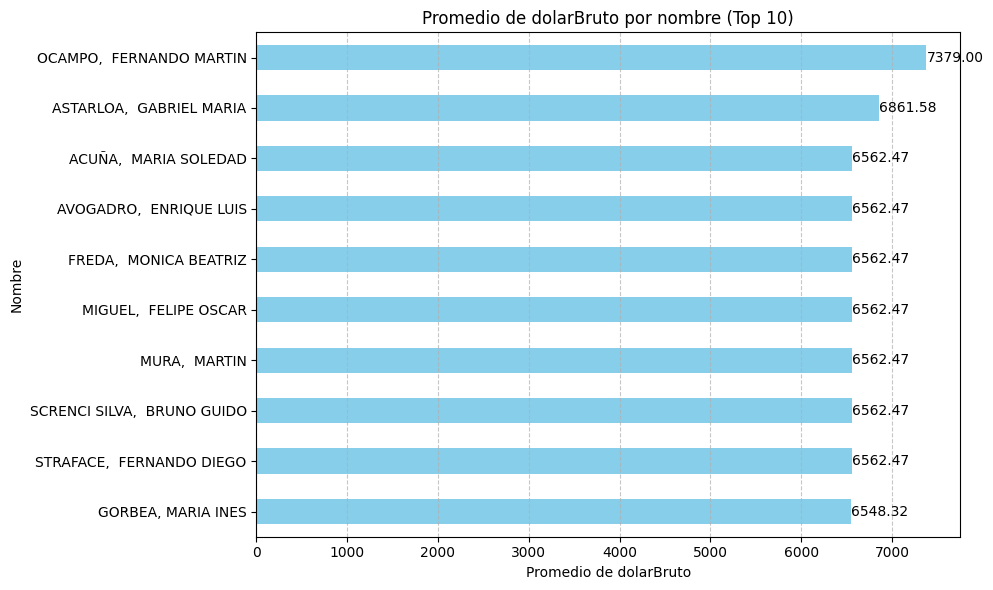

In [15]:
# Calcular el promedio de 'dolarBruto' para cada nombre
promedio_por_nombre = df_datos.groupby('NOMBRE')['dolarBruto'].mean()

# Seleccionar los 10 nombres con los promedios más altos
top_10_nombres_promedio_alto = promedio_por_nombre.nlargest(10)

# Invertir el orden de los nombres y los promedios
top_10_nombres_promedio_alto = top_10_nombres_promedio_alto[::-1]

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
grafico = top_10_nombres_promedio_alto.plot(kind='barh', color='skyblue')
plt.title('Promedio de dolarBruto por nombre (Top 10)')
plt.xlabel('Promedio de dolarBruto')
plt.ylabel('Nombre')

# Agregar etiquetas con los valores de los promedios en cada barra
for i, valor in enumerate(top_10_nombres_promedio_alto):
    plt.text(valor, i, f'{valor:.2f}', va='center')

plt.grid(axis='x', linestyle='--', alpha=0.7)  # Añadir rejilla vertical
plt.tight_layout()
plt.show()


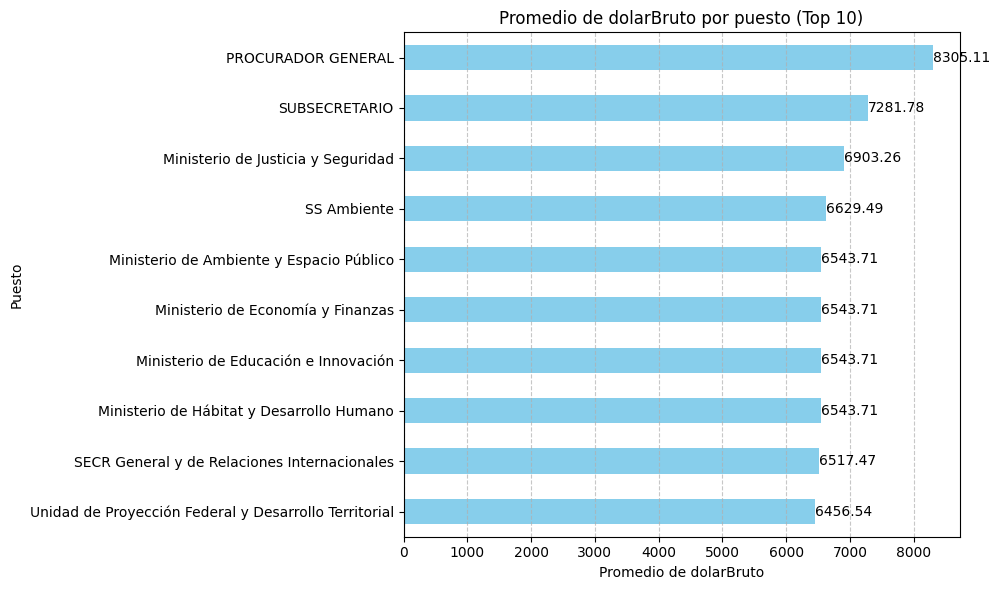

In [17]:

promedio_por_puesto = df_datos.groupby('PUESTO')['dolarBruto'].mean()

# Seleccionar los 10 puestos con los promedios más altos
top_10_puestos_promedio_alto = promedio_por_puesto.nlargest(10)

# Invertir el orden de los puestos y los promedios
top_10_puestos_promedio_alto = top_10_puestos_promedio_alto[::-1]

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
grafico = top_10_puestos_promedio_alto.plot(kind='barh', color='skyblue')
plt.title('Promedio de dolarBruto por puesto (Top 10)')
plt.xlabel('Promedio de dolarBruto')
plt.ylabel('Puesto')

# Agregar etiquetas con los valores de los promedios en cada barra
for i, valor in enumerate(top_10_puestos_promedio_alto):
    plt.text(valor, i, f'{valor:.2f}', va='center')

plt.grid(axis='x', linestyle='--', alpha=0.7)  # Añadir rejilla vertical
plt.tight_layout()
plt.show()


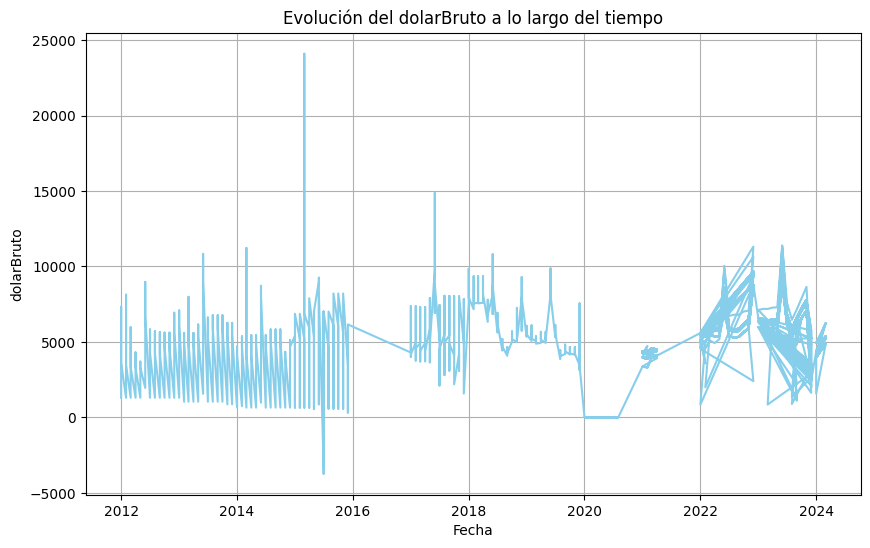

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(df_datos['FECHA'], df_datos['dolarBruto'], color='skyblue')
plt.title('Evolución del dolarBruto a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('dolarBruto')
plt.grid(True)
plt.show()

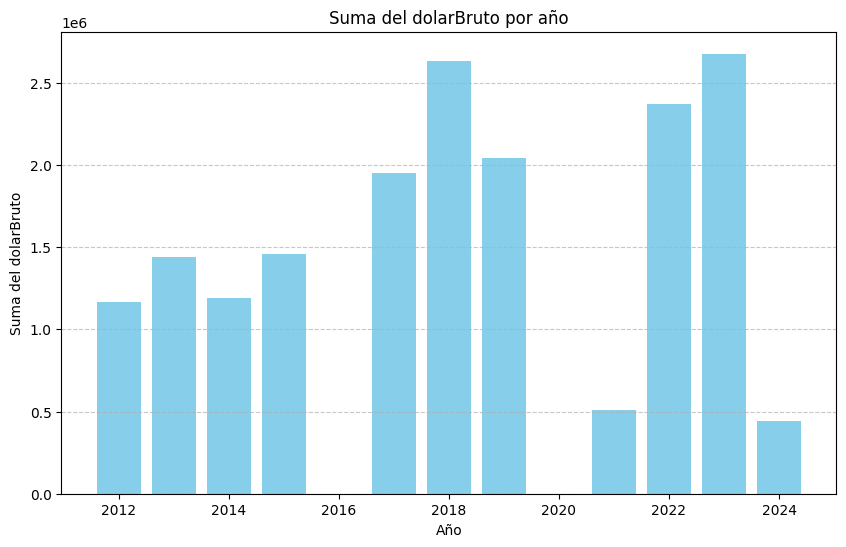

In [21]:
plt.figure(figsize=(10, 6))
suma_dolar_bruto_por_año = df_datos.groupby(df_datos['FECHA'].dt.year)['dolarBruto'].sum()
plt.bar(suma_dolar_bruto_por_año.index, suma_dolar_bruto_por_año.values, color='skyblue')
plt.title('Suma del dolarBruto por año')
plt.xlabel('Año')
plt.ylabel('Suma del dolarBruto')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


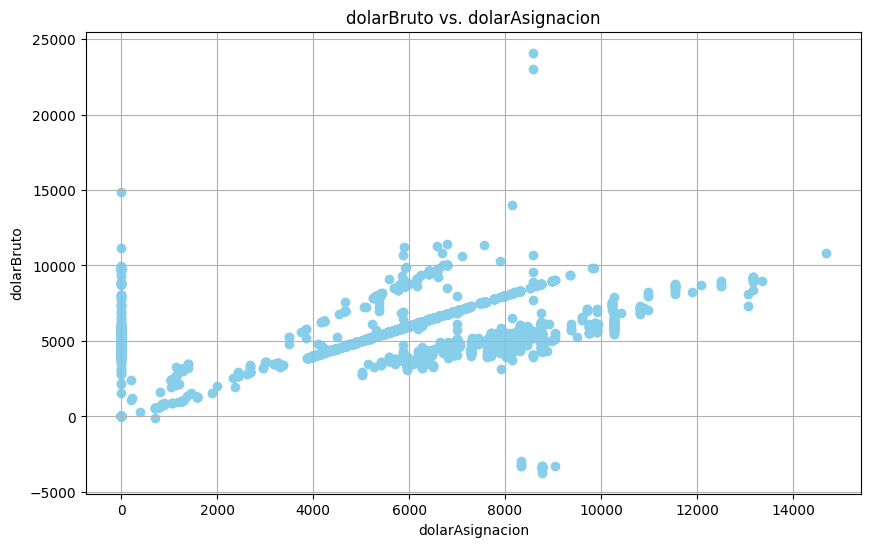

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(df_datos['dolarAsignacion'], df_datos['dolarBruto'], color='skyblue')
plt.title('dolarBruto vs. dolarAsignacion')
plt.xlabel('dolarAsignacion')
plt.ylabel('dolarBruto')
plt.grid(True)
plt.show()


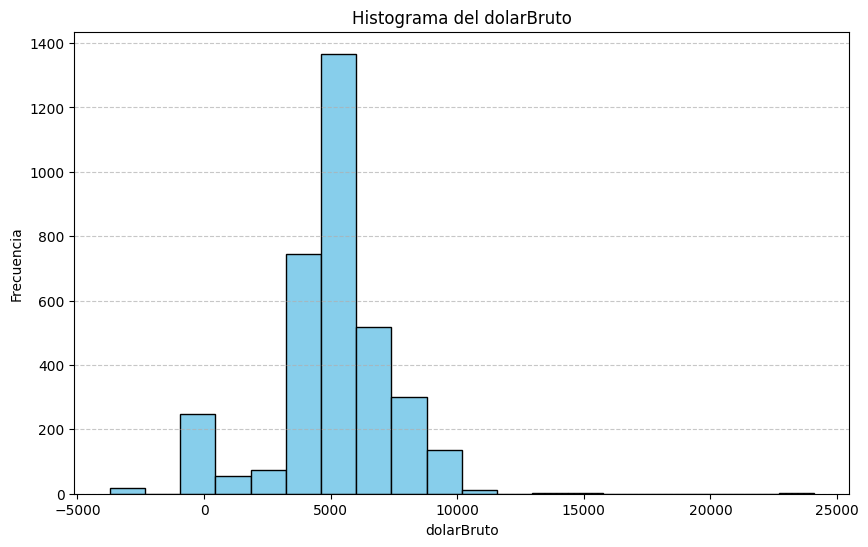

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(df_datos['dolarBruto'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma del dolarBruto')
plt.xlabel('dolarBruto')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


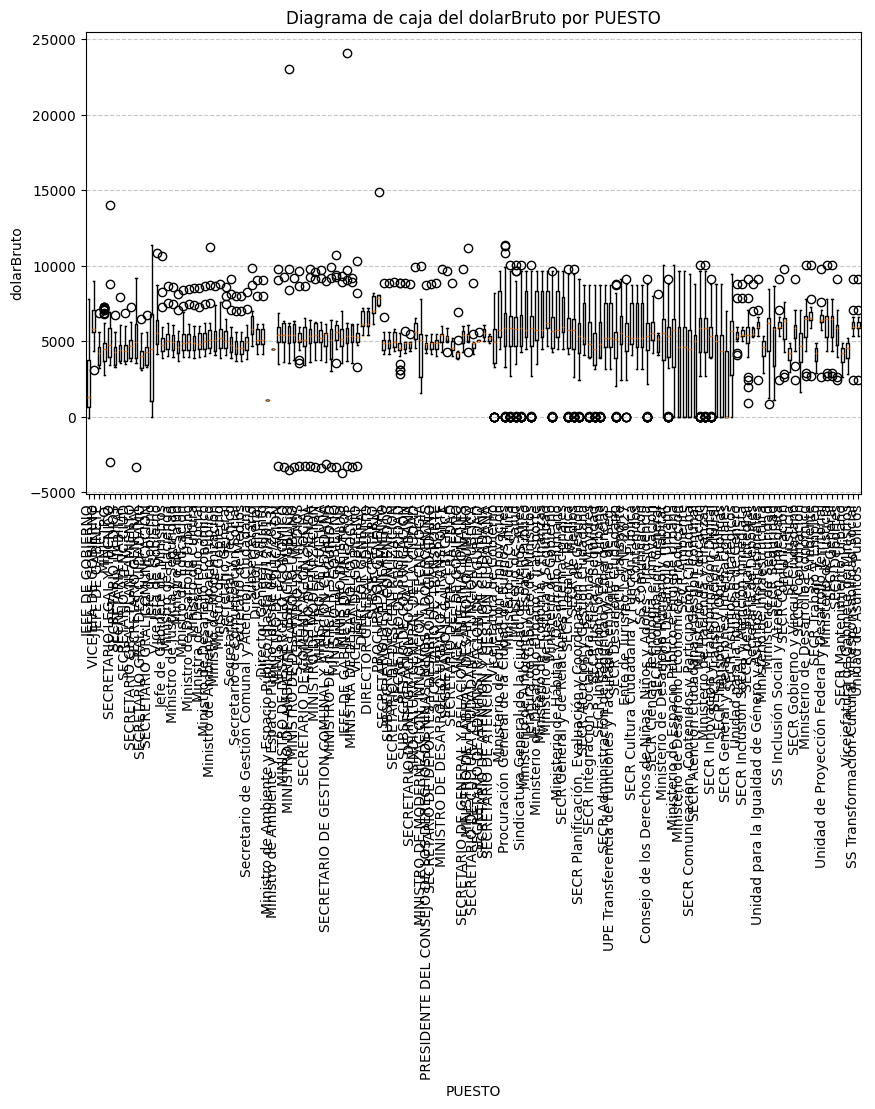

In [24]:
plt.figure(figsize=(10, 6))
plt.boxplot([df_datos[df_datos['PUESTO'] == puesto]['dolarBruto'] for puesto in df_datos['PUESTO'].unique()], labels=df_datos['PUESTO'].unique())
plt.title('Diagrama de caja del dolarBruto por PUESTO')
plt.xlabel('PUESTO')
plt.ylabel('dolarBruto')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


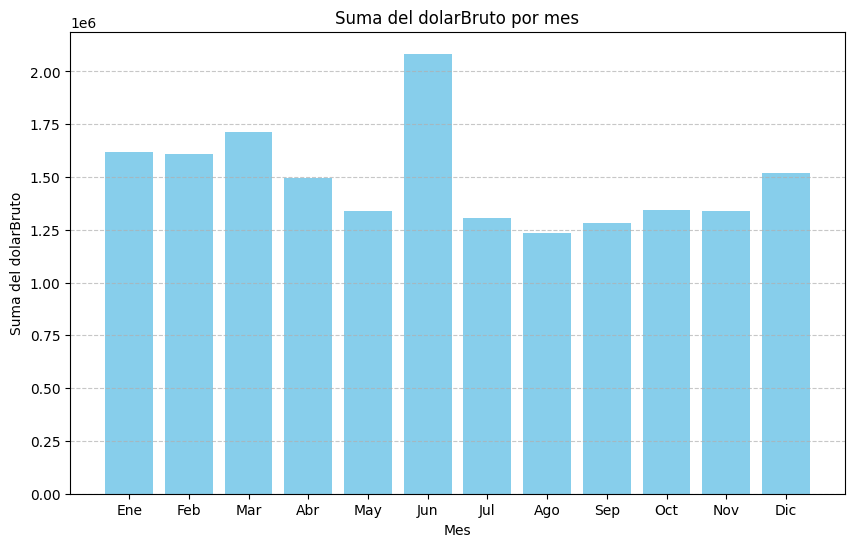

In [25]:
plt.figure(figsize=(10, 6))
suma_dolar_bruto_por_mes = df_datos.groupby(df_datos['FECHA'].dt.month)['dolarBruto'].sum()
plt.bar(suma_dolar_bruto_por_mes.index, suma_dolar_bruto_por_mes.values, color='skyblue')
plt.title('Suma del dolarBruto por mes')
plt.xlabel('Mes')
plt.ylabel('Suma del dolarBruto')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.show()


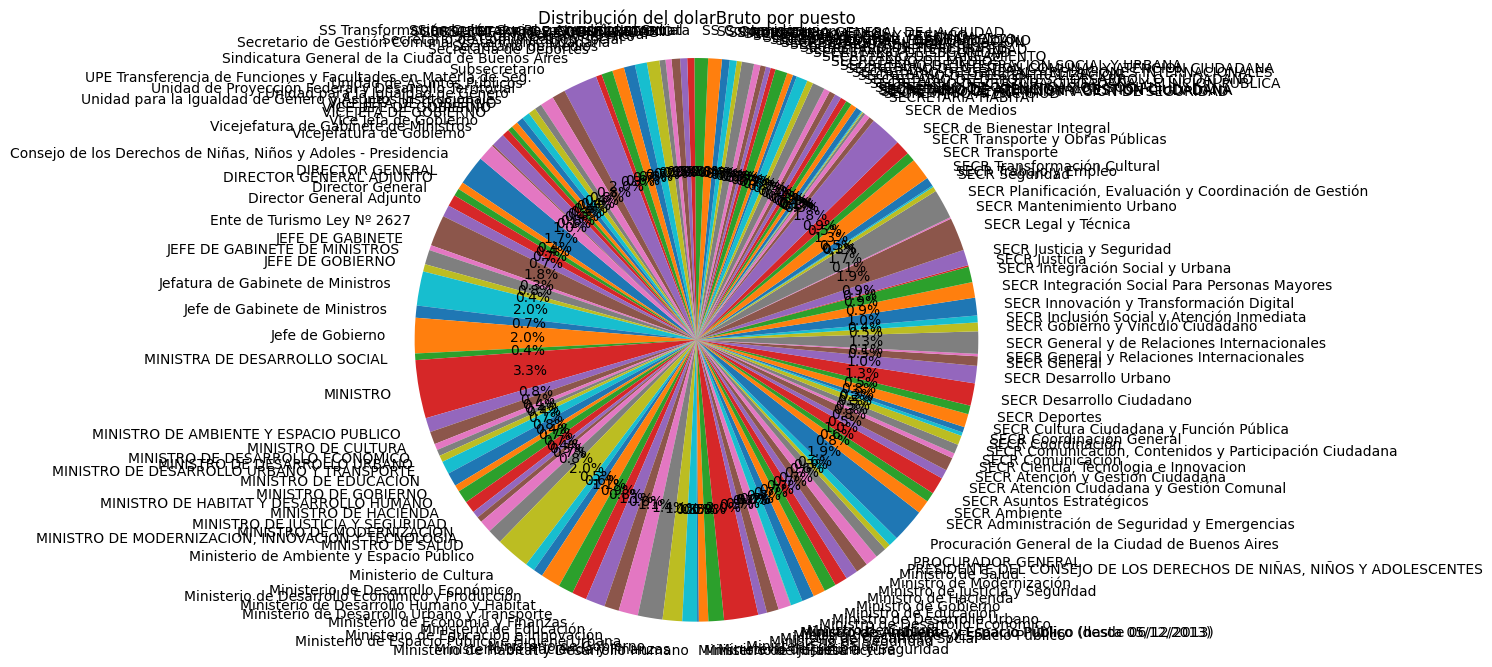

In [26]:
plt.figure(figsize=(8, 8))
suma_dolar_bruto_por_puesto = df_datos.groupby('PUESTO')['dolarBruto'].sum()
plt.pie(suma_dolar_bruto_por_puesto, labels=suma_dolar_bruto_por_puesto.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución del dolarBruto por puesto')
plt.axis('equal')
plt.show()


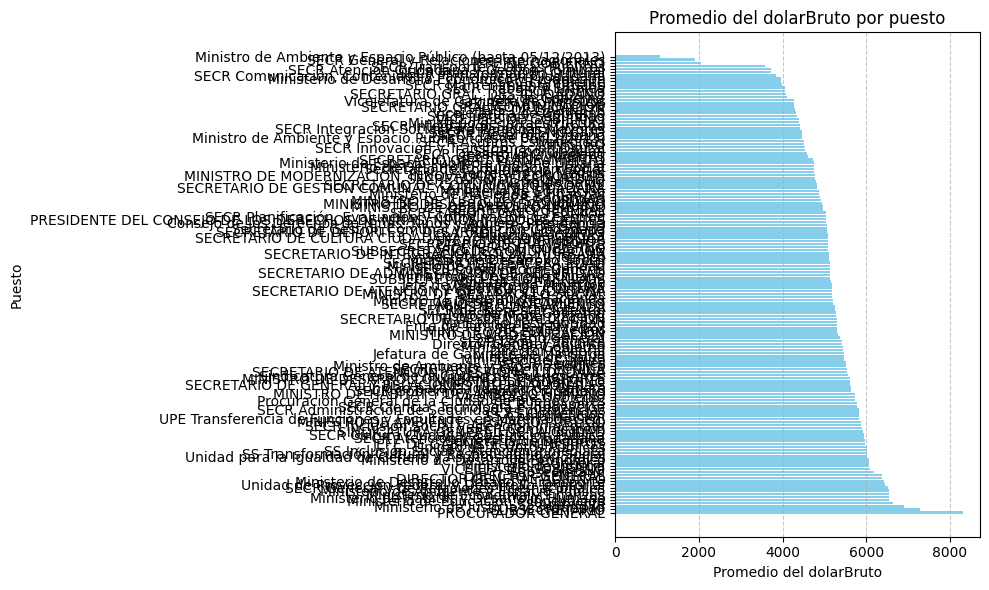

In [27]:
plt.figure(figsize=(10, 6))
promedio_dolar_bruto_por_puesto = df_datos.groupby('PUESTO')['dolarBruto'].mean().sort_values(ascending=False)
plt.barh(promedio_dolar_bruto_por_puesto.index, promedio_dolar_bruto_por_puesto.values, color='skyblue')
plt.title('Promedio del dolarBruto por puesto')
plt.xlabel('Promedio del dolarBruto')
plt.ylabel('Puesto')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


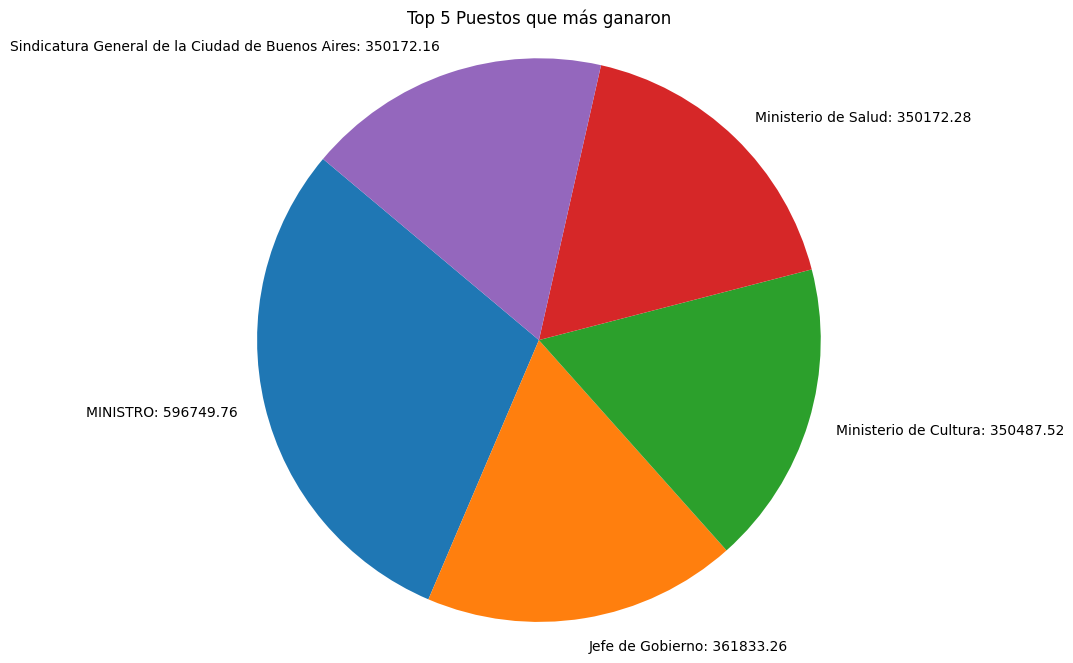

In [31]:
# Obtener los 5 puestos que más ganaron
puestos_mas_ganadores = df_datos.groupby('PUESTO')['dolarBruto'].sum().nlargest(5)

plt.figure(figsize=(8, 8))
plt.pie(puestos_mas_ganadores, labels=[f'{puesto}: {valor:.2f}' for puesto, valor in puestos_mas_ganadores.items()], startangle=140)
plt.title('Top 5 Puestos que más ganaron')
plt.axis('equal')
plt.show()



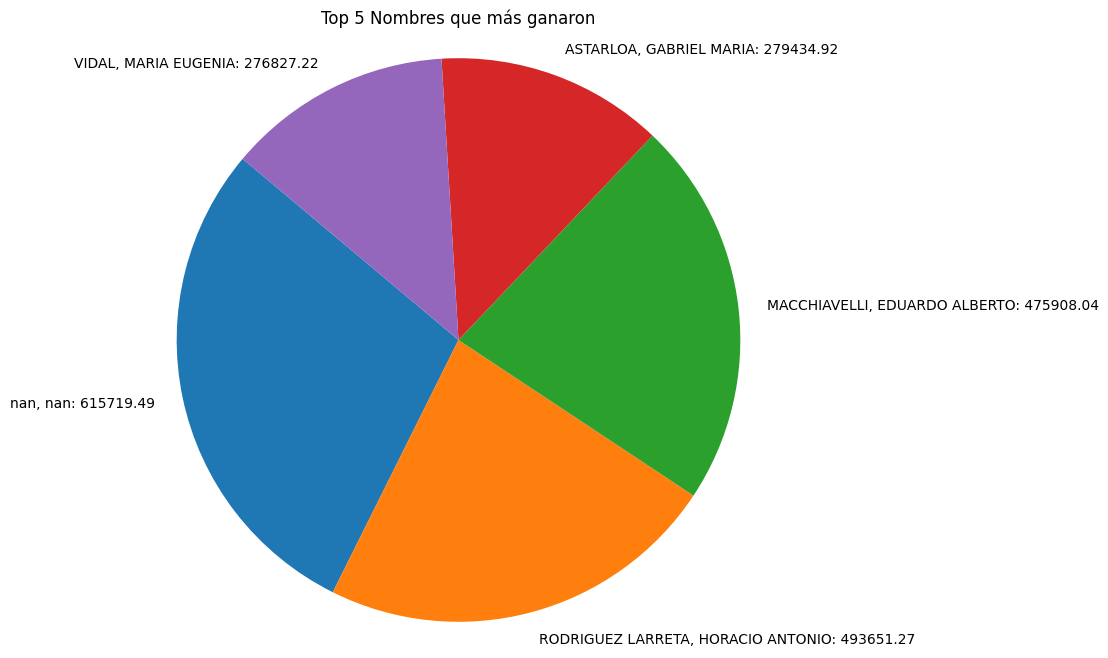

In [32]:
nombres_mas_ganadores = df_datos.groupby('NOMBRE')['dolarBruto'].sum().nlargest(5)

plt.figure(figsize=(8, 8))
plt.pie(nombres_mas_ganadores, labels=[f'{nombre}: {valor:.2f}' for nombre, valor in nombres_mas_ganadores.items()], startangle=140)
plt.title('Top 5 Nombres que más ganaron')
plt.axis('equal')
plt.show()

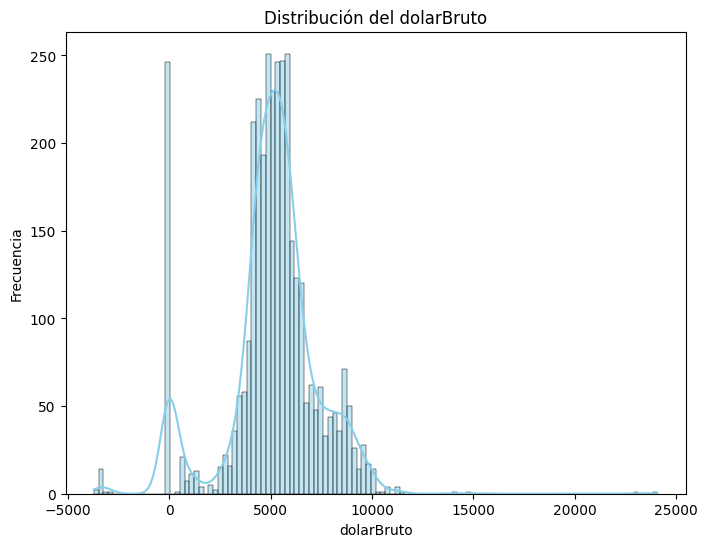

In [34]:

# Gráfico de distribución del dolarBruto
plt.figure(figsize=(8, 6))
sns.histplot(df_datos['dolarBruto'], kde=True, color='skyblue')
plt.title('Distribución del dolarBruto')
plt.xlabel('dolarBruto')
plt.ylabel('Frecuencia')
plt.show()

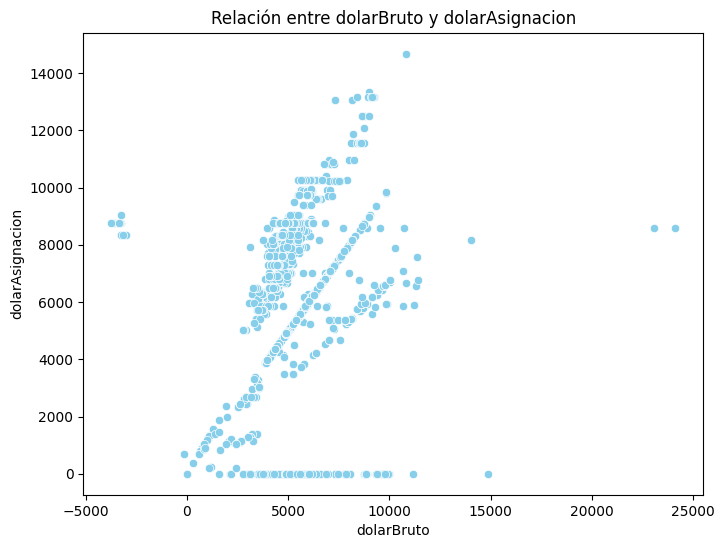

In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='dolarBruto', y='dolarAsignacion', data=df_datos, color='skyblue')
plt.title('Relación entre dolarBruto y dolarAsignacion')
plt.xlabel('dolarBruto')
plt.ylabel('dolarAsignacion')
plt.show()

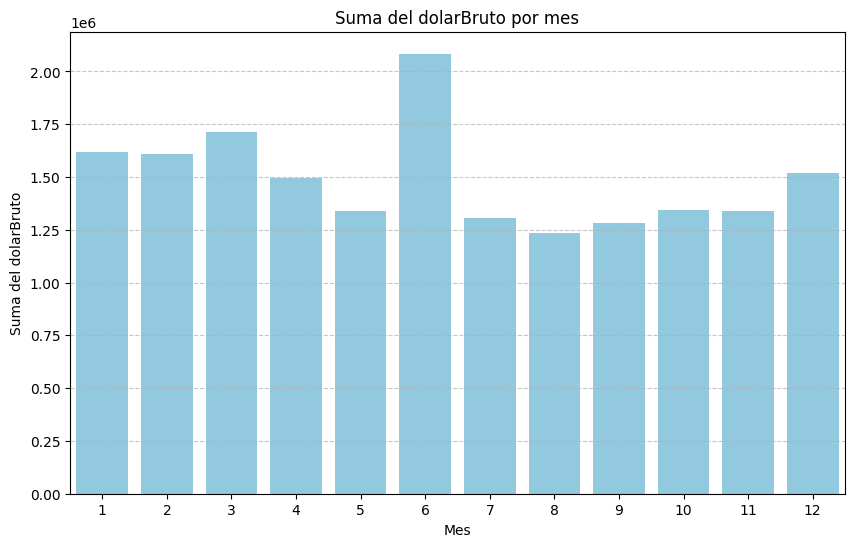

In [36]:
# Gráfico de barras de la suma del dolarBruto por mes
plt.figure(figsize=(10, 6))
suma_dolar_bruto_por_mes = df_datos.groupby(df_datos['FECHA'].dt.month)['dolarBruto'].sum()
sns.barplot(x=suma_dolar_bruto_por_mes.index, y=suma_dolar_bruto_por_mes.values, color='skyblue')
plt.title('Suma del dolarBruto por mes')
plt.xlabel('Mes')
plt.ylabel('Suma del dolarBruto')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

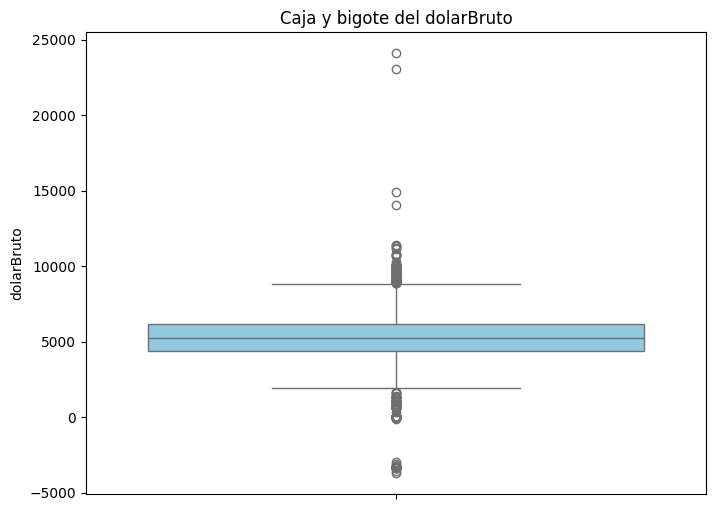

In [37]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='dolarBruto', data=df_datos, color='skyblue')
plt.title('Caja y bigote del dolarBruto')
plt.ylabel('dolarBruto')
plt.show()

/tmp/ipykernel_9262/404186615.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='FECHA', y='dolarBruto', data=df_datos, ci=None)


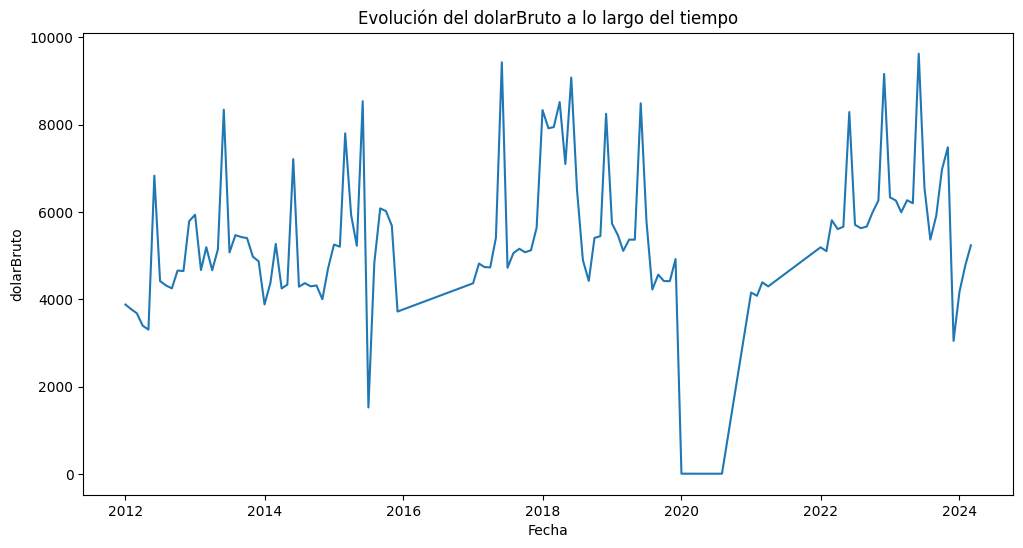

In [41]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='FECHA', y='dolarBruto', data=df_datos, ci=None)
plt.title('Evolución del dolarBruto a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('dolarBruto')
plt.show()


/tmp/ipykernel_9262/1820103835.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df_datos['FECHA'].dt.year, y='dolarBruto', hue=df_datos['FECHA'].dt.month, data=df_datos, ci=None)


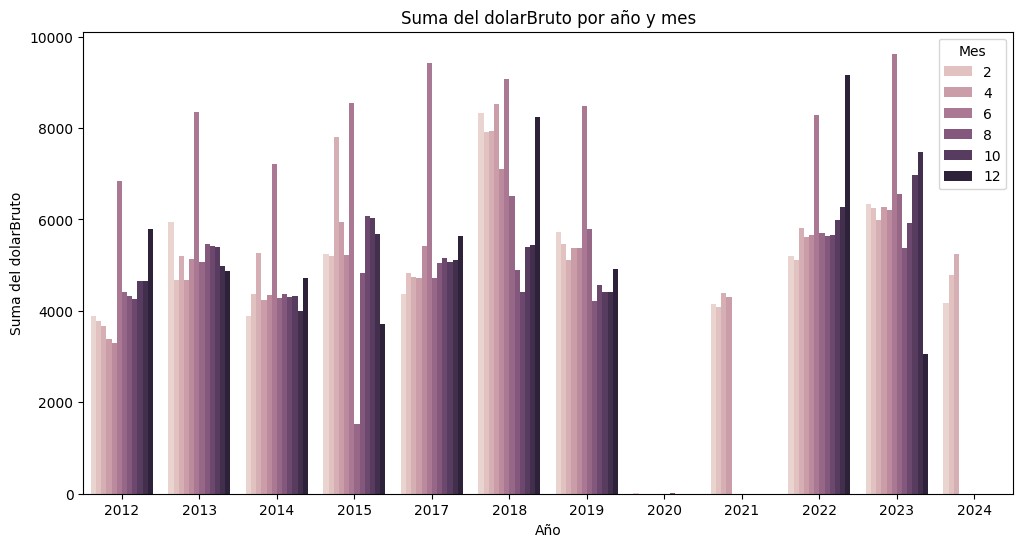

In [42]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df_datos['FECHA'].dt.year, y='dolarBruto', hue=df_datos['FECHA'].dt.month, data=df_datos, ci=None)
plt.title('Suma del dolarBruto por año y mes')
plt.xlabel('Año')
plt.ylabel('Suma del dolarBruto')
plt.legend(title='Mes')
plt.show()


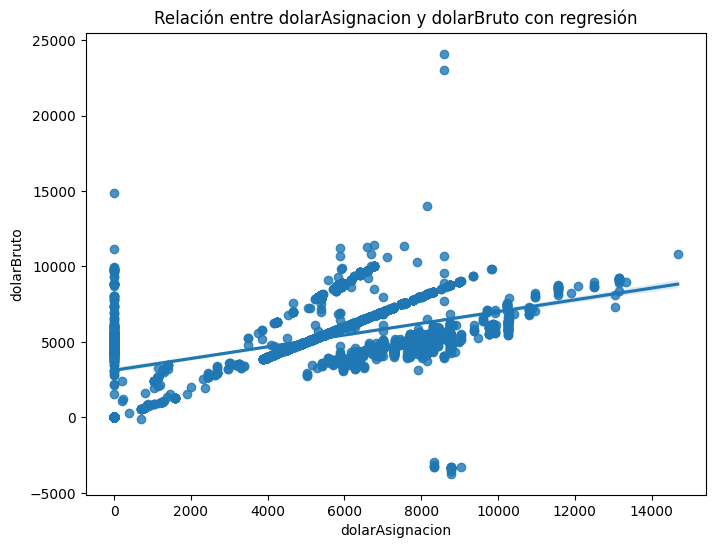

In [43]:
plt.figure(figsize=(8, 6))
sns.regplot(x='dolarAsignacion', y='dolarBruto', data=df_datos)
plt.title('Relación entre dolarAsignacion y dolarBruto con regresión')
plt.xlabel('dolarAsignacion')
plt.ylabel('dolarBruto')
plt.show()


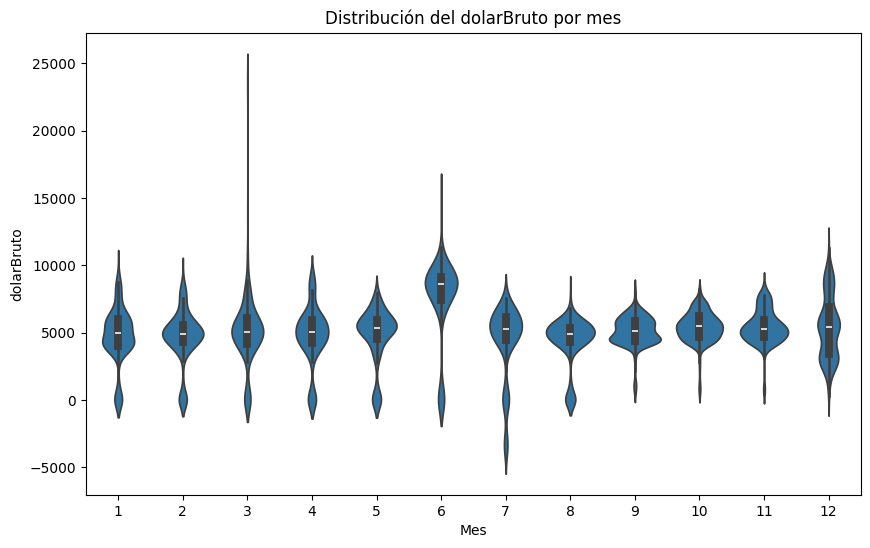

In [44]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=df_datos['FECHA'].dt.month, y='dolarBruto', data=df_datos)
plt.title('Distribución del dolarBruto por mes')
plt.xlabel('Mes')
plt.ylabel('dolarBruto')
plt.show()


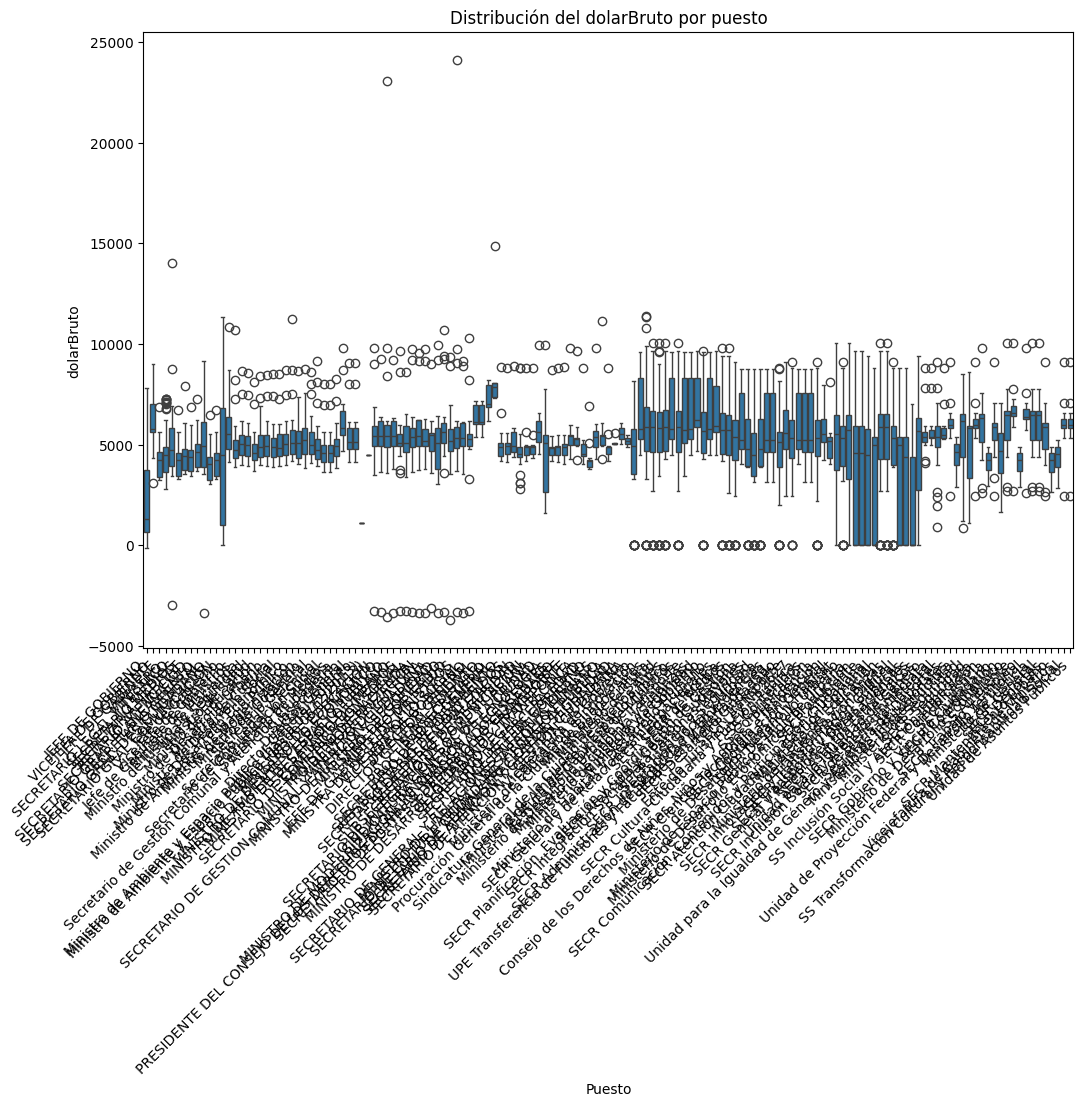

In [45]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='PUESTO', y='dolarBruto', data=df_datos)
plt.title('Distribución del dolarBruto por puesto')
plt.xlabel('Puesto')
plt.ylabel('dolarBruto')
plt.xticks(rotation=45, ha='right')
plt.show()
